In [75]:
# 프로젝트 : 인물 모드의 문제점 찾기
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [76]:
# Step 1.인물 모드
# 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 
# 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
# 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
# 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 
# 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [77]:
img_origs = []

for i in range(1,4):

    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image.jpeg'  
    img_orig = cv2.imread(img_path) 
    img_origs.append(img_orig)
    
#     print(img_orig.shape)
#     plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
#     plt.show()

In [78]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa375602430>)

In [79]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [80]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [81]:
# 모델에 이미지를 입력

img_path_1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image.jpeg'  
img_path_2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image2.jpeg'
img_path_3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image3.jpeg'


segvalues_1, output_1 = model.segmentAsPascalvoc(img_path_1)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_path_2)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_path_3)


segvalues_list = [segvalues_1,segvalues_2,segvalues_3]
outputs = [output_1, output_2,output_3]

In [82]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [83]:
for i in segvalues_list:
    print(i)

{'class_ids': array([ 0,  9, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])}
{'class_ids': array([ 0,  9, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])}
{'class_ids': array([ 0,  9, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],


In [84]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [85]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])


background
chair
person


In [86]:
# 사람을 나타내는 15번째 색상은 무엇인지 확인
#BGR
print(colormap[15]) 

#RGB로 바꾸기
seg_color = (128,128,192)
print(seg_color)

[192 128 128]
(128, 128, 192)


(1094, 821)


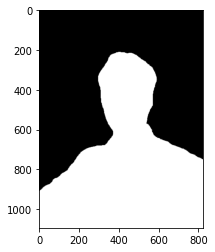

(1094, 821)


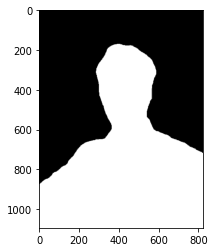

(1094, 821)


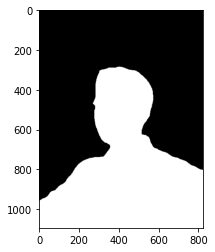

In [87]:
seg_maps = []

for output in outputs:
    
    seg_map = np.all(output==seg_color, axis=-1)
    seg_maps.append(seg_map)
    
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()

In [88]:
img_masks = []
color_masks = []

for img_orig, seg_map in zip(img_origs, seg_maps):

    # 원 이미지와 겹쳐서 세그멘테이션이 잘 되는지 보기
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    img_masks.append(img_mask)
    
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    color_masks.append(color_mask)
    
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

#     plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
#     plt.show()

In [89]:
# blur 처리
imgs_orig_blur = []

for img_orig in img_origs:
    img_orig_blur = cv2.blur(img_orig, (70,70))  # 15,15 / 35,35 / 70,70 test
    imgs_orig_blur.append(img_orig_blur)
    
#     plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
#     plt.show()

print(len(imgs_orig_blur))


3


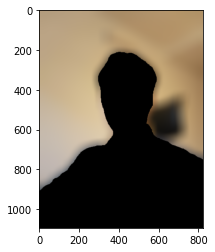

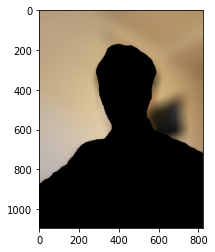

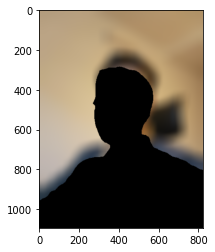

In [90]:
# extract background
img_bg_blurs = []
img_mask_colors = []
for img_orig_blur, img_mask in zip(imgs_orig_blur, img_masks):
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_mask_colors.append(img_mask_color)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    img_bg_blurs.append(img_bg_blur)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()

In [91]:
# concat background and human

for img_orig, img_mask_color, img_bg_blur in zip(img_origs, img_mask_colors, img_bg_blurs):

    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
#     plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
#     plt.show()

In [93]:
# Step 1-2. 고양이 사진

# Cat
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/streetcat.jpeg'
img_cat = cv2.imread(img_path) 

print(img_cat.shape)
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [ ]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

In [ ]:
plt.imshow(output)
plt.show()

In [ ]:
segvalues 

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

In [ ]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

In [ ]:
colormap[8]

In [ ]:
seg_color = (0, 0, 64)

In [ ]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray') # ocean, gray, Accent, Blues, twilight
plt.show()

In [ ]:
img_show = img_cat.copy()
print(img_show.shape)

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
print(color_mask.shape)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
img_orig_blur = cv2.blur(img_cat, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_concat = np.where(img_mask_color==255, img_cat, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
# Step 1-3. 크로마키 포토그라피

# 이미지 1개 그리기
def draw_img(img, img_title='', cmap=None):
    print(img.shape)

    plt.imshow(img, cmap)
    plt.title(img_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

In [40]:
# 이미지 2개 그리기
def draw_imgs(img_1, img_2, img_1_title='', img_2_title=''):
    plt.figure(figsize=(12,8))

    plt.subplot(211)
    plt.imshow(img_1)
    plt.title(img_1_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.subplot(212)
    plt.imshow(img_2)
    plt.title(img_2_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()


In [41]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/space.jpg'  
img_space = cv2.imread(img_path) 

print(img_cat.shape)
draw_img(cv2.cvtColor(img_space, cv2.COLOR_BGR2RGB), 'img_space')

AttributeError: 'NoneType' object has no attribute 'shape'

In [42]:
print(img_space.shape)
print(img_cat.shape)
print(img_mask_color.shape)

(768, 841, 3)


AttributeError: 'NoneType' object has no attribute 'shape'

In [43]:
img_mask_color = cv2.resize(img_mask_color, (1280, 853))
img_cat = cv2.resize(img_cat, (1280, 853))
print(img_space.shape)
print(img_cat.shape)
print(img_mask_color.shape)

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [44]:
# 고양이만 남기고 배경을 0(검은색) 처리
cat_only_img_concat = np.where(img_mask_color==255, img_cat, 0)

# 고양이 resize
h, w, c = cat_only_img_concat.shape
cat_img_resize = cv2.resize(cat_only_img_concat, (w//4, h//4), cv2.INTER_AREA)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src data type = 17 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


In [45]:
draw_img(cv2.cvtColor(cat_img_resize, cv2.COLOR_BGR2RGB))

NameError: name 'cat_img_resize' is not defined

In [46]:
back_img_show = img_space.copy()

refined_y = 200
refined_x = 400

alpha = 0.2  # 투명도
sticker_area = back_img_show[refined_y:refined_y+cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]]
back_img_show[refined_y:refined_y +cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]] = \
cv2.addWeighted(sticker_area, alpha, np.where(cat_img_resize==0,sticker_area,cat_img_resize).astype(np.uint8), 1-alpha, 0)


NameError: name 'cat_img_resize' is not defined

(768, 841, 3)


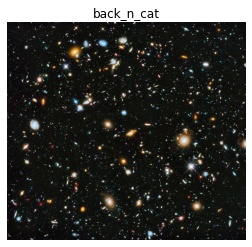

In [47]:
draw_img(cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'back_n_cat')

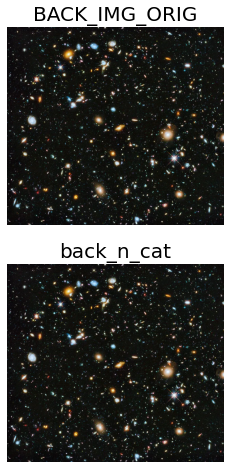

In [48]:
draw_imgs(cv2.cvtColor(img_space, cv2.COLOR_BGR2RGB), cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'BACK_IMG_ORIG', 'back_n_cat')


In [49]:
# step2. 사진의 문제를 해결해보자

# 인물의 윤곽선이 배경과 합쳐지면서 흐려지는 문제가 발생하였는데 정확하게 처리하기가 어려웠습니다.

# step3. 해결방법을 제안해 보기
# 엣지 강화(Edge Enhancement): Sobel 연산자나 Canny 엣지 디텍터와 같은 엣지 감지 알고리즘을 사용하여 이미지의 윤곽선을 강조할 수 있습니다.

# 마스킹(Masking): 피사체와 배경을 분리하기 위해 이미지 세그멘테이션 기술을 사용할 수 있습니다. 이를 통해 배경에만 블러 효과를 적용하고 피사체의 윤곽선을 보존할 수 있습니다.

# 컨투어 추적(Contour Tracking): findContours 함수를 사용하여 피사체의 윤곽선을 찾고, drawContours 함수로 윤곽선을 그린 다음 이를 마스크로 사용하여 배경 블러와 합성할 수 있습니다.

# GrabCut 알고리즘: 배경과 피사체를 분리하는 데 GrabCut 알고리즘을 사용할 수 있습니다. 이 알고리즘은 사용자가 대략적으로 피사체를 지정하면, 나머지 이미지에서 피사체를 정교하게 분리해줍니다.

# 가우시안 블러(Gaussian Blur) 조절: GaussianBlur 함수의 커널 크기를 조절하여 블러 효과의 강도를 섬세하게 조절할 수 있습니다. 블러를 적용할 때 엣지 주변의 영역을 보호하려면, 윤곽선 주변에 마스크를 적용해야 합니다.

# Bilateral 필터: 엣지를 보존하면서 이미지를 부드럽게 만들고 싶을 때는 bilateralFilter를 사용할 수 있습니다. 이 필터는 엣지 주변의 픽셀 값 차이를 고려하여 엣지를 유지하면서 이미지를 스무딩합니다.

# 커스텀 필터: OpenCV의 filter2D 함수를 사용하여 사용자 정의 필터를 만들어 엣지를 강조하거나 보존하는 등의 복잡한 처리를 할 수 있습니다.

# Semantic segmentation mask의 오류를 보완할 수 있는 솔루션과 이유 설명

# Semantic segmentation mask란 이미지의 각 픽셀이 어떤 클래스에 속하는지를 표현하는 맵입니다. 예를 들어, 아래 그림은 사람, 자동차, 트램, 신호등, 표지판, 나무, 도로 등으로 이미지가 분할된 것을 보여줍니다.

# Semantic segmentation mask의 오류는 다음과 같은 원인으로 발생할 수 있습니다.

# 회고
# 내 사진 3장, 동물 사진, 크로마키 사진을 구현하였으나 인물사진에서 배경과 사람간의 경계선이 뚜렷하게 윤곽선이 생겼다.
# 분할마스크의 오류를 보완하는 연습을 했습니다.
# 블러처리를 하고 싶은 부분과 선명하게 보여주고 싶은 부분의 경계선을 깔끔하게 처리하는 것이 어려웠습니다.